In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os 
for dirname, _, filenames in os.walk('D:\Credit_Card_Customers\model\BankChurners.csv'):
    for filename in filenames: 
        print(os.path.join(dirname, filename))

<>:6: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Dell Vostro 3580\AppData\Local\Temp\ipykernel_10108\1778503386.py:6: SyntaxWarning: invalid escape sequence '\C'
  for dirname, _, filenames in os.walk('D:\Credit_Card_Customers\model\BankChurners.csv'):


In [2]:
data = pd.read_csv('D:\Credit_Card_Customers\model\BankChurners.csv')
data = data.drop(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM'})
data.shape

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Dell Vostro 3580\AppData\Local\Temp\ipykernel_10108\2128862974.py:1: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv('D:\Credit_Card_Customers\model\BankChurners.csv')


(10127, 20)

In [3]:
import seaborn as sns
import plotly.express as plx
import matplotlib.pyplot as plt

In [4]:
data_copy = data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [5]:
cat_features = data.select_dtypes(['object','category']).columns.to_list()
data_cat = data[cat_features]
data_cat

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [6]:
a_map = {'Attrited Customer':1, 'Existing Customer':0}
data['Attrition_Flag'] = data['Attrition_Flag'].map(a_map)
g_map = {'M':0, 'F':1}
data['Gender'] = data['Gender'].map(g_map)
from sklearn.preprocessing import OrdinalEncoder

marital = OrdinalEncoder(categories=[['Unknown','Single','Married','Divorced']])
data['Marital_Status'] = marital.fit_transform(data_cat[['Marital_Status']])
edu = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College','Graduate',
                                  'Post-Graduate','Doctorate']])
data['Education_Level'] = edu.fit_transform(data_cat[['Education_Level']])
income = OrdinalEncoder(categories=[['Unknown','Less than $40K','$40K - $60K','$60K - $80K',
                                     '$80K - $120K','$120K +']])
data['Income_Category'] = income.fit_transform(data_cat[['Income_Category']])
card = OrdinalEncoder(categories=[['Blue', 'Silver','Gold','Platinum']])
data['Card_Category'] = card.fit_transform(data_cat[['Card_Category']])

In [7]:
data[cat_features].head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0,0,2.0,2.0,3.0,0.0
1,0,1,4.0,1.0,1.0,0.0
2,0,0,4.0,2.0,4.0,0.0
3,0,1,2.0,0.0,1.0,0.0
4,0,0,1.0,2.0,3.0,0.0


In [8]:
cont = data.select_dtypes(['float64','int64','category']).columns.to_list()
data_cont = data[cont]
data_cont.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2.0,2.0,3.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,4.0,1.0,1.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,4.0,2.0,4.0,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,2.0,0.0,1.0,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,1.0,2.0,3.0,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
from sklearn.preprocessing import StandardScaler

credit = StandardScaler()
data['Credit_Limit'] = credit.fit_transform(data_cont[['Credit_Limit']])


In [10]:
revolv_bal = StandardScaler()
data['Total_Revolving_Bal'] = revolv_bal.fit_transform(data_cont[['Total_Revolving_Bal']])

In [11]:
avg_open = StandardScaler()
data['Avg_Open_To_Buy'] = avg_open.fit_transform(data_cont[['Avg_Open_To_Buy']])

In [12]:
trans = StandardScaler()
data['Total_Trans_Amt'] = trans.fit_transform(data_cont[['Total_Trans_Amt']])

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

def preprocessCustomersPipeline(data):
    """Prepares the original customers data table in a form ready for the Deep Learning model, using
    all the transformations and edits we used above, and returns a ready dataset"""

    data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',1)
    data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 1)
    data = data.drop('CLIENTNUM', 1)
    
    #Categorical Features
    a_map = {'Attrited Customer':1, 'Existing Customer':0}
    data['Attrition_Flag'] = data['Attrition_Flag'].map(a_map)
    g_map = {'M':0, 'F':1}
    data['Gender'] = data['Gender'].map(g_map)
    
    marital = OrdinalEncoder(categories=[['Unknown','Single','Married','Divorced']])
    data['Marital_Status'] = marital.fit_transform(data[['Marital_Status']])

    edu = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College','Graduate',
                                      'Post-Graduate','Doctorate']])
    data['Education_Level'] = edu.fit_transform(data[['Education_Level']])

    income = OrdinalEncoder(categories=[['Unknown','Less than $40K','$40K - $60K','$60K - $80K',
                                         '$80K - $120K','$120K +']])
    data['Income_Category'] = income.fit_transform(data[['Income_Category']])

    card = OrdinalEncoder(categories=[['Blue', 'Silver','Gold','Platinum']])
    data['Card_Category'] = card.fit_transform(data[['Card_Category']])
    
    #Numerical Features
    credit = StandardScaler()
    data['Credit_Limit'] = credit.fit_transform(data[['Credit_Limit']])
    revolv_bal = StandardScaler()
    data['Total_Revolving_Bal'] = revolv_bal.fit_transform(data[['Total_Revolving_Bal']])
    avg_open = StandardScaler()
    data['Avg_Open_To_Buy'] = avg_open.fit_transform(data[['Avg_Open_To_Buy']])
    trans = StandardScaler()
    data['Total_Trans_Amt'] = trans.fit_transform(data[['Total_Trans_Amt']])
    
    nums = ['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt', 'Total_Trans_Ct']
    for n in nums:
        s = StandardScaler()
        data[n] = s.fit_transform(data[[n]])
    return data

In [14]:
x = data.drop('Attrition_Flag', axis = 1)
y = data[['Attrition_Flag']]

In [15]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=42)
print('Train X :', train_x.shape)
print('Test X :', test_x.shape)
print('Train Y :', train_y.shape)
print('Test Y :', test_y .shape)

Train X : (7595, 19)
Test X : (2532, 19)
Train Y : (7595, 1)
Test Y : (2532, 1)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
predictions = log_reg.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print("Logistic Regression Accuracy :", accuracy)

Logistic Regression Accuracy : 0.8870458135860979


c:\Users\Dell Vostro 3580\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell Vostro 3580\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2113
           1       0.75      0.48      0.59       419

    accuracy                           0.89      2532
   macro avg       0.82      0.72      0.76      2532
weighted avg       0.88      0.89      0.88      2532



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

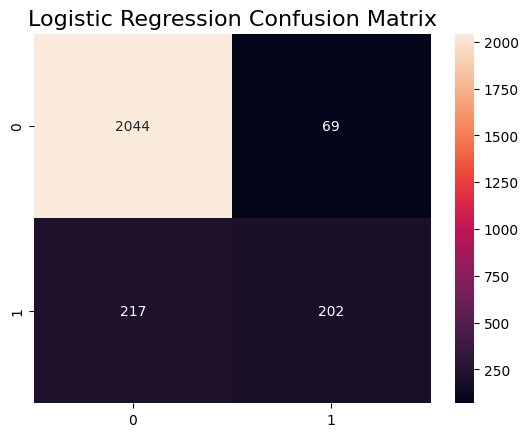

In [18]:

sns.heatmap(confusion_matrix(test_y, predictions), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=16)

In [19]:
new_sample = [[45,0,3,2.0,2.0,3.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.06]]
df_newSample = pd.DataFrame(new_sample)
df_newSample.columns = x.columns
pred = log_reg.predict(df_newSample)[0]
print(pred)

0


In [22]:
import pickle
# pickle.dump(log_reg, open('log_reg_CreditCardCustomers.pkl', 'wb'))
with open('card_encoder.pkl', 'wb') as f:
    pickle.dump(card, f)

with open('income_encoder.pkl', 'wb') as f:
    pickle.dump(income, f)
    
with open('gender_encoder.pkl', 'wb') as f:
    pickle.dump(g_map, f)

with open('marital_encoder.pkl', 'wb') as f:
    pickle.dump(marital, f)
    
with open('edu_encoder.pkl', 'wb') as f:
    pickle.dump(edu, f)

with open('column_names_encoder.pkl', 'wb') as f:
    pickle.dump(x.columns, f)

In [ ]:
# import json
# gender = {'gender_value': list(map(int, x.Gender.unique()))}
# with open ("gender_value.json", 'w') as f:
#     f.write(json.dumps(gender))

# edu = {'edu_value': list(x.Education_Level.unique())}
# with open ("edu_value.json", 'w') as f:
#     f.write(json.dumps(edu))
    
# marital = {'marital_value': list(x.Marital_Status.unique())}
# with open ("marital_value.json", 'w') as f:
#     f.write(json.dumps(marital))
    
# income = {'income_value': list(x.Income_Category.unique())}
# with open ("income_value.json", 'w') as f:
#     f.write(json.dumps(income))
    
# card = {'card_value': list(x.Card_Category.unique()), 'columms':list(x.columns)}
# with open ("card.json", 'w') as f:
#     f.write(json.dumps(card))
